<a href="https://colab.research.google.com/github/krogenth/IsBird/blob/main/CSC574_Is_Bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preliminaries
from __future__ import print_function

import keras
import keras.utils as np_util
from keras.preprocessing import image   # needed for image processing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

# new stuff from keras: https://keras.io/examples/vision/image_classification_from_scratch/
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import os
import zipfile

%matplotlib inline

In [2]:
# mount google drive so we can access bird images
# requires authentication to mount
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_directory = "/content/birds/train"
validate_directory = "/content/birds/valid"
test_directory = "/content/birds/test"

In [4]:
!unzip "/content/drive/MyDrive/birds.zip" -d "/content/birds"

Streaming output truncated to the last 5000 lines.
  inflating: /content/birds/train/TOWNSENDS WARBLER/150.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/151.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/152.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/153.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/154.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/155.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/156.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/157.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/158.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/159.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/160.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/161.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/162.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/163.jpg  
  inflating: /content/birds/train/TOWNSENDS WARBLER/164.jpg  
  inflating: /conte

In [5]:
# basic image and reading information
image_size = (224, 224)
batch_size = 16

In [6]:
categories = [ f.name for f in os.scandir(train_directory) if f.is_dir() ]

In [7]:
len(categories)

260

In [8]:
training_generator = ImageDataGenerator(rescale=1./255)
training_dataset = training_generator.flow_from_directory(directory=train_directory, target_size=image_size, color_mode="rgb", batch_size=batch_size, class_mode="categorical", shuffle=True, seed=69420)

Found 36609 images belonging to 260 classes.


In [9]:
validation_generator = ImageDataGenerator(rescale=1./255)
validation_dataset = validation_generator.flow_from_directory(directory=validate_directory, target_size=image_size, color_mode="rgb", batch_size=batch_size, class_mode="categorical", shuffle=True, seed=69420)

Found 1300 images belonging to 260 classes.


In [10]:
testing_generator = ImageDataGenerator(rescale=1./255)
testing_dataset = testing_generator.flow_from_directory(directory=test_directory, target_size=image_size, color_mode="rgb", batch_size=batch_size, class_mode="categorical", shuffle=True, seed=69420)

Found 1300 images belonging to 260 classes.


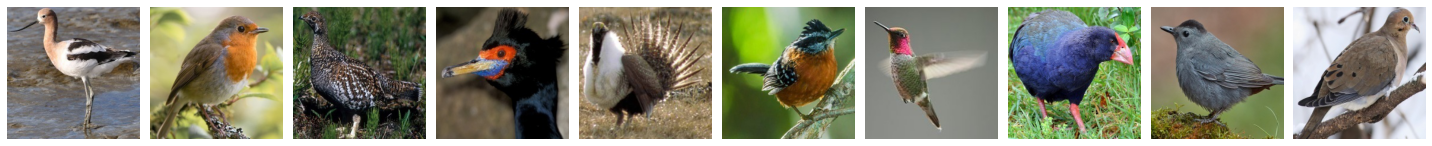

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
def plotImages(images_iter):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_iter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(testing_dataset)
plotImages(images)
print(labels)

In [18]:
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding ="same", activation='relu', input_shape=(224, 224, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid"),
    layers.Conv2D(64, kernel_size=(3, 3), padding ="same", activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #layers.BatchNormalization(),
    layers.Dropout(0.5),
    #layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    layers.Flatten(),
    layers.Dense(units=len(categories), activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 788544)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 260)              

In [20]:
# compile model first
learning_rate = 0.001
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adamax(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])

In [21]:
batch_size = 64
epochs = 5
history = model.fit(training_dataset, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=True, validation_data=validation_dataset)

Epoch 1/5
2289/2289 [==============================] - 198s 86ms/step - loss: 5.4347 - accuracy: 0.0882 - val_loss: 3.4572 - val_accuracy: 0.3454
Epoch 2/5
2289/2289 [==============================] - 197s 86ms/step - loss: 2.2458 - accuracy: 0.5436 - val_loss: 2.6396 - val_accuracy: 0.4592
Epoch 3/5
2289/2289 [==============================] - 197s 86ms/step - loss: 0.6479 - accuracy: 0.8691 - val_loss: 2.5191 - val_accuracy: 0.4415
Epoch 4/5
2289/2289 [==============================] - 198s 86ms/step - loss: 0.1478 - accuracy: 0.9776 - val_loss: 2.6141 - val_accuracy: 0.4415
Epoch 5/5
2289/2289 [==============================] - 198s 86ms/step - loss: 0.0573 - accuracy: 0.9971 - val_loss: 2.7557 - val_accuracy: 0.4054


In [22]:
score = model.evaluate(testing_dataset, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 3s 34ms/step - loss: 2.7364 - accuracy: 0.4200
Test loss: 2.7364468574523926
Test accuracy: 0.41999998688697815


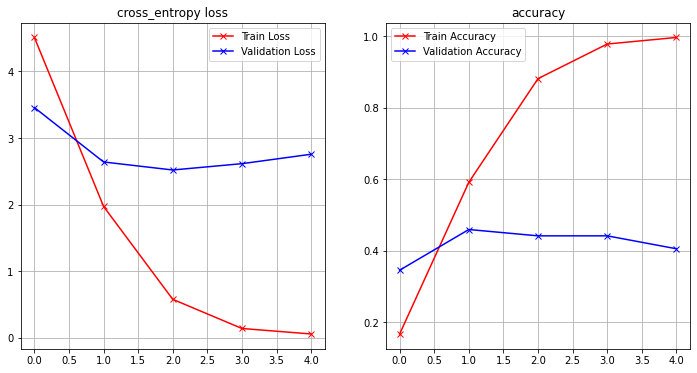

In [23]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)